1.Mengimport data

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
as_ = pd.read_csv('/content/KNNAlgorithmDataset.csv')

In [ ]:
as_.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


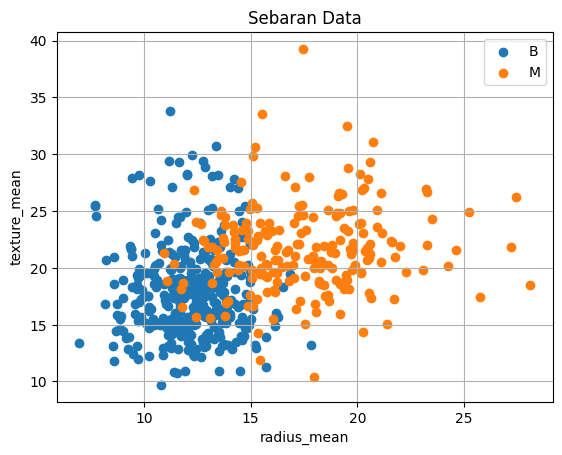

In [ ]:
import matplotlib.pyplot as plt
#menangkap objek figure dan akses
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'diagnosis'

for diagnosis, d in as_.groupby('diagnosis'):
  # Membuat scatter plot untuk setiap grup
    # x = data 'radius_mean' , y = texture_men
    # 'label=radius_mean' memberikan label untuk setiap grup (diambil dari nilai kolom 'diagnosis')
    ax.scatter(d['radius_mean'], d['texture_mean'], label=diagnosis)

# Menambahkan legenda untuk membedakan grup berdasarkan 'diagnosis'
plt.legend()

# Menambahkan judul pada plot
plt.title('Sebaran Data')

# Menambahkan label pada sumbu x (radius_mean)
plt.xlabel('radius_mean')

# Menambahkan label pada sumbu y (radius_mean)
plt.ylabel('texture_mean')

# Menambahkan grid untuk mempermudah pembacaan plot
plt.grid(True)

#menampilkan plot ke layar
plt.show()

2.Preprocessing Dengan Label Binarizer

In [ ]:
# mengimpor pustaka NumPy
import numpy as np

# Mengambil dua kolom dari DataFrame as_, yaitu radius_mean dan texture_mean. Ini mewakili fitur yang akan digunakan untuk pelatihan model.
x_train = np.array(as_[['radius_mean', 'texture_mean']])

# Mengambil kolom diagnosis dari DataFrame as_, yang berfungsi sebagai target atau label untuk klasifikasi.
y_train = np.array(as_['diagnosis'])

# mencetak isi dari x_train dan y_train
print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 ...
 [16.6  28.08]
 [20.6  29.33]
 [ 7.76 24.54]]

y_train: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 

In [ ]:

from sklearn.preprocessing  import LabelBinarizer
# Membuat objek LabelBinarizer, yang digunakan untuk mengonversi label kategori menjadi format biner
lb = LabelBinarizer()

# Menggunakan LabelBinarizer untuk mengonversi y_train (label asli) menjadi format biner
y_train = lb.fit_transform(y_train)

# Mencetak hasil y_train setelah diubah menjadi array 1D
print(f'y_train:\n{y_train}\n')

y_train:
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 

In [ ]:
# Mengubah array 2D y_train menjadi array 1D menggunakan fungsi flatten()
# Setelah LabelBinarizer, y_train berbentuk array 2D dengan setiap label dalam format biner,
# seperti [[0], [1], [1], ...]. flatten() mengubahnya menjadi [0, 1, 1, ...].
y_train = y_train.flatten()

# Mencetak hasil y_train setelah diubah menjadi array 1D
print(f'y_train: {y_train}')

y_train: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0

3.Training KNN Classification Model

In [ ]:
# mengimpor kelas KNeighborsClassifier dari pustaka sklearn.neighbors.
from sklearn.neighbors import KNeighborsClassifier

# menetapkan jumlah tetangga terdekat (k) yang akan dipertimbangkan oleh model saat melakukan klasifikasi.
k = 3

# Membuat objek model KNN dengan jumlah tetangga k yang telah ditentukan.
model = KNeighborsClassifier(n_neighbors=k)

#Melatih model menggunakan data fitur (x_train) dan label target (y_train) sehingga dapat melakukan prediksi pada data baru di masa depan.
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

4.Prediksi dengan KNN Classification Model

In [ ]:
# objek untuk patokan
radius_mean = 20.57
texture_mean = 21.25

# Membuat array NumPy dengan data baru [A_radius_mean, A_texture_mean] dan mengubahnya menjadi array 2D dengan reshape
# reshape(1, -1) mengubah array 1D menjadi array 2D dengan 1 baris dan sejumlah kolom sesuai panjang array
x_new = np.array([radius_mean, texture_mean]).reshape(1, -1)

# Menampilkan x_new untuk memverifikasi format data baru (array 2D dengan 1 baris)
x_new

array([[20.57, 21.25]])

In [ ]:
# mendapatkan prediksi dari model K-Nearest Neighbors (model) berdasarkan data input yang diberikan.
y_new = model.predict(x_new)

# Menampilkan hasil prediksi y_new yang berisi label (diagnosis) untuk data baru
y_new

array([1])

In [ ]:
#Mengubah label prediksi y_new dari format numerik (seperti 0 dan 1) kembali ke format label kategorikal asli.
lb.inverse_transform(y_new)

array(['M'], dtype='<U1')

5.Visualisasi Nearest Neighbours

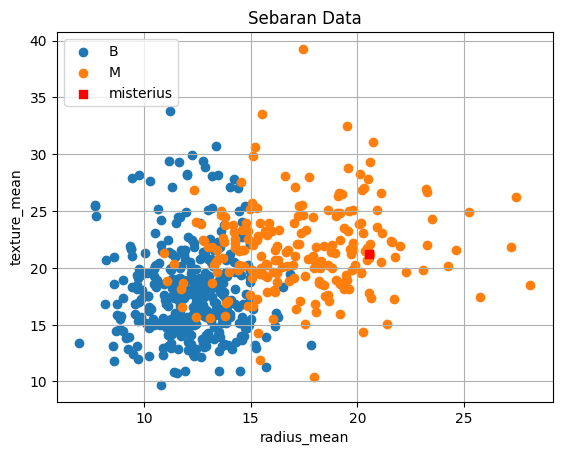

In [ ]:
# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'diagnosis'
for diagnosis, d in as_.groupby('diagnosis'):
    ax.scatter(d['radius_mean'], d['texture_mean'], label=diagnosis)

# Menambahkan titik data baru (A_radius _mean, A_texture_mean)
plt.scatter(radius_mean,
            texture_mean,
            color='red', # Menentukan warna titik data baru menjadi merah
            marker='s',# Menandakan titik data baru menggunakan bentuk persegi
            label = 'misterius') # Label untuk titik data misterius

# Menambahkan legenda untuk membedakan grup berdasarkan 'diagnosis' dan data baru 'Misterius'
plt.legend(loc='upper left')

plt.title('Sebaran Data')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.grid(True)
plt.show()


6.kalkulasi distance

In [ ]:
# membuat sebuah array NumPy bernama misterius yang berisi dua elemen: radius_mean dan texture_mean.
misterius = np.array([radius_mean, texture_mean])
misterius

array([20.57, 21.25])

In [ ]:
# 'x_train' adalah array atau DataFrame yang berisi data latih (fitur) yang digunakan untuk melatih model
x_train


array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [ ]:
# mengimpor fungsi euclidean dari modul scipy.spatial.distance, yang digunakan untuk menghitung jarak Euclidean antara dua titik.
from scipy.spatial.distance import euclidean

# embuat sebuah list comprehension untuk menghitung jarak Euclidean antara array misterius (yang berisi dua fitur) dan setiap baris dalam x_train (data fitur pelatihan).
data_jarak = [euclidean(misterius, d) for d in x_train]
data_jarak

[11.171987289645472,
 3.4800000000000004,
 0.879999999999999,
 9.191267594842401,
 6.915670611010909,
 9.835491853486536,
 2.6448629454094594,
 6.872845116834803,
 7.591429377923502,
 8.57649112399704,
 4.966145386514575,
 5.850957186649036,
 3.8160843806184372,
 5.437683330242761,
 6.973894177573961,
 8.713495280310882,
 5.995540009040054,
 4.4764383163403485,
 1.1779643458101776,
 9.843424200957715,
 9.316206309437334,
 14.144697098206098,
 8.730005727374984,
 1.88472809710048,
 3.922155019883841,
 5.940319856708055,
 5.996540669419328,
 2.2003636063160115,
 6.628219972209733,
 6.887670143089025,
 4.320092591600323,
 9.094800712495024,
 4.478325579946149,
 5.379442350281299,
 5.574091854284428,
 3.8450617680344243,
 6.337452169444752,
 8.053601678752184,
 6.836585405010311,
 7.10302752352826,
 7.137632660763652,
 9.620519736479938,
 3.863107557394693,
 7.354250471666029,
 7.421158939141514,
 4.124184767926868,
 13.136360835482558,
 7.840159437154324,
 10.789569036805872,
 7.157436692

In [ ]:
# menambahkan kolom baru bernama 'jarak' ke DataFrame as_.
as_['jarak'] = data_jarak

# mengurutkan DataFrame as_ berdasarkan kolom 'jarak'.
as_.sort_values('jarak')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,jarak
499,91485,M,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.218800,0.112100,...,163.20,1760.0,0.14640,0.35970,0.51790,0.21130,0.2480,0.08999,NaN,0.022361
237,883263,M,20.480,21.46,132.50,1306.0,0.08355,0.08348,0.090420,0.060220,...,161.70,1750.0,0.12280,0.23110,0.31580,0.14450,0.2238,0.07127,NaN,0.228473
323,895100,M,20.340,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.150400,...,171.10,1938.0,0.15920,0.44920,0.53440,0.26850,0.5558,0.10240,NaN,0.347131
535,919555,M,20.550,20.86,137.80,1308.0,0.10460,0.17390,0.208500,0.132200,...,160.20,1809.0,0.12680,0.31350,0.44330,0.21480,0.3077,0.07569,NaN,0.390512
365,901088,M,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.097990,0.077850,...,161.20,1780.0,0.13270,0.23760,0.27020,0.17650,0.2609,0.06735,NaN,0.545711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,87127,B,10.800,9.71,68.77,357.6,0.09594,0.05736,0.025310,0.016980,...,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699,NaN,15.120334
59,858477,B,8.618,11.79,54.34,224.5,0.09752,0.05272,0.020610,0.007799,...,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026,NaN,15.242766
232,88203002,B,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,NaN,15.658100
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,...,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382,NaN,15.678435


7.EVALUASI KNN CLASIFICATION MODEL

In [ ]:
#  membuat array fitur untuk data pengujian (x_test) dan mengonversi label menjadi format biner (y_test), lalu mencetak keduanya.
x_test = np.array([[20.590	, 21.46	], [17.460	, 13.43], [10.800	, 11.79	], [20.550	,21.78	]])
y_test = lb.transform(np.array(['M', 'M', 'B', 'B']))

print(f'x_test:\n{x_test}\n')
print(f'y_test:\n{y_test}')

x_test:
[[20.59 21.46]
 [17.46 13.43]
 [10.8  11.79]
 [20.55 21.78]]

y_test:
[[1]
 [1]
 [0]
 [0]]


In [ ]:
#  menghasilkan prediksi label untuk data pengujian (x_test) menggunakan model yang telah dilatih, dan menyimpan hasilnya dalam y_pred.
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1])

8.Evaluasi Model Dengan Accuracy Score

In [ ]:
#  menghitung dan menampilkan akurasi model klasifikasi dengan membandingkan label sebenarnya dan label yang diprediksi.
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.5


9.Evaluasi Model Dengan Precision Score

In [ ]:
#  menghitung dan menampilkan nilai presisi model klasifikasi. Presisi memberikan indikasi seberapa akurat prediksi positif model
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'Precision: {prec}')

Precision: 0.5


10.Evaluasi Model Dengan Recall Score

In [ ]:
# menghitung dan menampilkan nilai recall model klasifikasi.
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

Recall: 0.5


11.Evaluasi Model Dengan F1 Score

In [ ]:
# menghitung dan menampilkan nilai F1-score model klasifikasi. F1-score memberikan gambaran yang baik tentang performa model ketika ada ketidakseimbangan antara kelas positif dan negatif
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


F1 Score: 0.5


12.Evaluasi Model Dengan Classification Report

In [ ]:
# menghasilkan dan menampilkan laporan klasifikasi yang memberikan informasi rinci tentang performa model untuk setiap kelas
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



In [ ]:
# menghitung dan menampilkan koefisien korelasi Matthews (MCC), yang memberikan ukuran yang lebih baik tentang performa model klasifikasi,
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')
#


MCC: 0.0
